Name-  Aastha Kundra

PGID-  12310022

### PROBLEM 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import MDS
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import LabelEncoder

In [2]:
import os
print(os.getcwd())

C:\Users\aasth\Downloads


In [5]:
os.chdir(r'C:\Users\aasth\Downloads')

We can see that this mushroom dataset contains only categorical features

In [6]:
# Load the mushroom dataset
mushroom_data = pd.read_csv('mushrooms.csv')

# Preprocessing: Convert categorical variables into numerical
mushroom_data = pd.get_dummies(mushroom_data)

# Separate features and target variable
X = mushroom_data.drop(columns=['class_e', 'class_p'])
y = mushroom_data['class_p']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Define function to perform parameter sweep on decision trees
def tree_sweep(train, test, size=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], purity=[60, 65, 70, 75, 80, 85, 90, 95]):
    results = []

    for s in size:
        for p in purity:
            # Build decision tree with current combination of size and purity
            tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=s, min_impurity_decrease=(1-p/100))
            tree.fit(train.drop(columns=['class_p']), train['class_p'])

            # Calculate training and testing accuracies
            train_accuracy = accuracy_score(train['class_p'], tree.predict(train.drop(columns=['class_p'])))
            test_accuracy = accuracy_score(test['class_p'], tree.predict(test.drop(columns=['class_p'])))

            results.append([s, p, train_accuracy, test_accuracy])

    # Save results to CSV file
    df = pd.DataFrame(results, columns=['Size', 'Purity', 'Training Accuracy', 'Test Accuracy'])
    df.to_csv('tree_sweep.csv', index=False)

    return df, results

# Perform parameter sweep on decision trees
df, tree_sweep_results = tree_sweep(pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1))

In [8]:
df

,Size,Purity,Training Accuracy,Test Accuracy
0,10,60,0.888906,0.878154
1,10,65,0.888906,0.878154
2,10,70,0.888906,0.878154
3,10,75,0.888906,0.878154
4,10,80,0.919680,0.912615
...,...,...,...,...
75,100,75,0.888906,0.878154
76,100,80,0.919680,0.912615
77,100,85,0.919680,0.912615
78,100,90,0.919680,0.912615


In [13]:
# Find the most optimal tree with highest test accuracy
optimal_tree = max(tree_sweep_results, key=lambda x: x[3])
optimal_tree

[10, 95, 0.9526080935528543, 0.9384615384615385]

In [10]:
# Generate rules from the optimal tree
optimal_tree_size = optimal_tree[0]
optimal_tree_purity = optimal_tree[1]
optimal_tree_classifier = DecisionTreeClassifier(criterion='entropy', min_samples_split=optimal_tree_size, min_impurity_decrease=(1-optimal_tree_purity/100))
optimal_tree_classifier.fit(pd.concat([X_train, y_train], axis=1).drop(columns=['class_p']), y_train)

DecisionTreeClassifier(criterion='entropy',
                       min_impurity_decrease=0.050000000000000044,
                       min_samples_split=10)

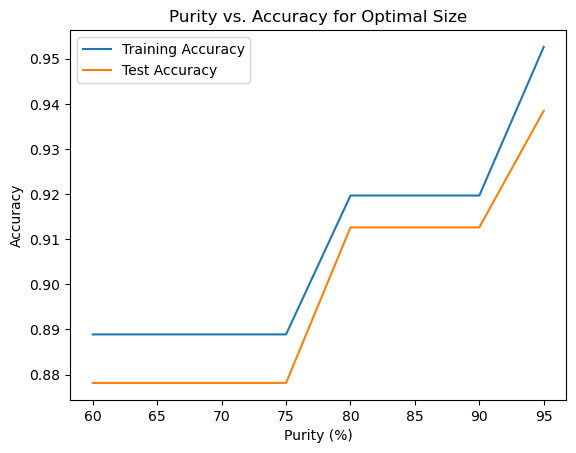

In [11]:
# Plot purity vs. train/test accuracy curves for the optimal size
purity_values = [result[1] for result in tree_sweep_results if result[0] == optimal_tree_size]
train_accuracies = [result[2] for result in tree_sweep_results if result[0] == optimal_tree_size]
test_accuracies = [result[3] for result in tree_sweep_results if result[0] == optimal_tree_size]

plt.plot(purity_values, train_accuracies, label='Training Accuracy')
plt.plot(purity_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Purity (%)')
plt.ylabel('Accuracy')
plt.title('Purity vs. Accuracy for Optimal Size')
plt.legend()
plt.show()


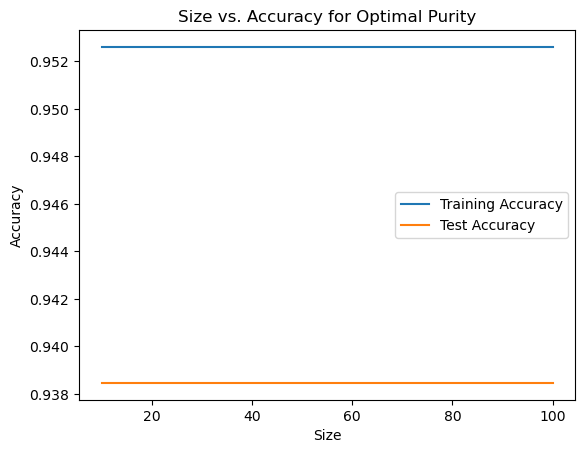

In [12]:
# Plot size vs. train/test accuracy curves for the optimal purity
size_values = [result[0] for result in tree_sweep_results if result[1] == optimal_tree_purity]
train_accuracies = [result[2] for result in tree_sweep_results if result[1] == optimal_tree_purity]
test_accuracies = [result[3] for result in tree_sweep_results if result[1] == optimal_tree_purity]

plt.plot(size_values, train_accuracies, label='Training Accuracy')
plt.plot(size_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Size')
plt.ylabel('Accuracy')
plt.title('Size vs. Accuracy for Optimal Purity')
plt.legend()
plt.show()

Summary:
- We can see from the above plot of Purity vs Accuracy, for optimal size accuracy remains same till 75% purity and then after that accuracy increases as purity increases.This shows that model is sufficiently complex and dataset is of high quality.
- Accuracy is more for the training dataset than the test dataset.This is obvious and should always be there.
- For the last plot of accuracy vs size for optimal purity, we see that accuracy does not depend on size.